# Analisis Exploratorios de los Datos (EDA)

### Fuente de datos:
+ [DataSet de Google Maps !!!](https://drive.google.com/drive/folders/1Wf7YkxA0aHI3GpoHc9Nh8_scf5BbD4DA?usp=drive_link):  Google Drive Henry.

+ [DataSet de Yelp !!!](https://drive.google.com/drive/folders/1TI-SsMnZsNP6t930olEEWbBQdo_yuIZF?usp=drive_link):  Google Drive Henry..
<br/>
- - -

Importando Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta
import random
from scipy.stats import norm

import json
import os                       # Libreria para manejo de arhivos y directorios del sistema
import glob                     # crear listas de archivos a partir de búsquedas con comodines en un directorio
import pyarrow as pa
import jsonlines                # Permite procesar un registro por vez
import pyarrow.parquet as pq    # Permite leer archivos en formato parquet
import pickle5 as pickle        # Permite leer archivos con formatp pkl, para archivos version 5

- - -
### Funciones generales

Funcion que permite buscar archivos en un directorio segun un filtro deseado

In [3]:
# Recibe el directorio a trabajar y el patron o filtro que se desea mostrar.

def listar_archivos_segun_patron_con_directorio(directorio, patron):
    return glob.glob(directorio + patron)

- - -
+ DataSet de Yelp !!!
- - -

`Datasets: review`

Cargando los archivos parquet reducidos como un Dataframe

In [ ]:
directorio = "../Datasets/Datasets_Yelp/review/"
ls_archivo = listar_archivos_segun_patron_con_directorio(directorio, "review-reducido_*.parquet")
df_list = []                                        # Un dataframe vacio para ir adicionando
for archivo in ls_archivo:                          # Leer cada archivo parquet en un DataFrame de Pandas y adicionarlo
    tabla_review = pq.read_table(source=archivo)    # Se crea una tabla con cada archivo
    df = tabla_review.to_pandas()                   # Se transforma la tabla en un dataframe
    df_list.append(df)                              # Se adicionan a los dataframe
df_review_reducido_concatenado = pd.concat(df_list) # Se concatenan todos los DataFrames en uno solo
df_review_reducido_concatenado = df_review_reducido_concatenado.reset_index(drop=True)  # Se resetea el indice a uno secuencial y consecutivo

- - -
`Datasets: user`

Cargando los archivos parquet reducidos como un Dataframe

In [4]:
directorio = "../Datasets/Datasets_Yelp/user/"
ls_archivo = listar_archivos_segun_patron_con_directorio(directorio, "user-reducido_*.parquet")
df_list = []                                    # Un dataframe vacio para ir adicionando
for archivo in ls_archivo:                      # Leer cada archivo parquet en un DataFrame de Pandas y adicionarlo
    tabla_user = pq.read_table(source=archivo)  # Se crea una tabla con cada archivo
    df = tabla_user.to_pandas()                 # Se transforma la tabla en un dataframe
    df_list.append(df)                          # Se adicionan a los dataframe
df_user_reducido_concatenado = pd.concat(df_list)                                   # Se concatenan todos los DataFrames en uno solo
df_user_reducido_concatenado = df_user_reducido_concatenado.reset_index(drop=True)  # Se resetea el indice a uno secuencial y consecutivo

Determinando Outlies

In [8]:
# Se obtiene un dataframe con las columnas de tipo numerica
df_usr_reducido_numericas = df_user_reducido_concatenado.select_dtypes(include='number')

In [9]:
df_usr_reducido_numericas.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000,329174.000000
mean,5.522277,3.940600,1.028088,2.080274,0.142122,3.339362,0.119432,0.018598,0.006990,0.002160,0.000368,0.137605,0.219543,0.203834,0.203834,0.070173,0.115838
std,17.331363,102.297381,46.779541,94.283383,2.360721,1.518958,38.134347,0.666965,0.540315,0.359842,0.052142,8.041922,21.075510,35.314043,35.314043,4.709288,16.903681
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,3.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3148.000000,26061.000000,18810.000000,25050.000000,600.000000,5.000000,21829.000000,314.000000,283.000000,204.000000,26.000000,4191.000000,9423.000000,19889.000000,19889.000000,2614.000000,8662.000000


Creando un grafico tipo bigote

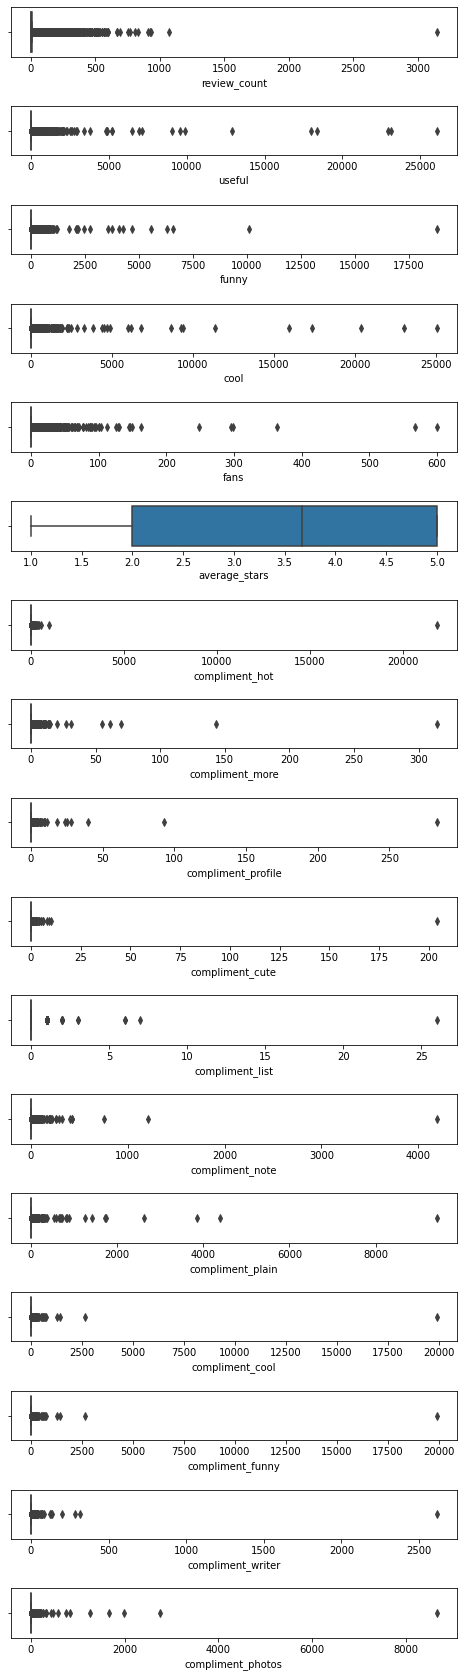

In [10]:
# Verificar si hay outlies o valores extremos, se debe decidir si se eliminan o se mantienen, 
# eso depende de lo que deseamos.
columnas_numericas = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
                      'compliment_hot', 'compliment_more', 'compliment_profile',
                      'compliment_cute', 'compliment_list', 'compliment_note',
                      'compliment_plain', 'compliment_cool', 'compliment_funny',
                      'compliment_writer', 'compliment_photos']
fig, ax = plt.subplots(nrows=17, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df_usr_reducido_numericas, ax=ax[i])
    # ax[i].set_title(col)

- - -
`Datasets: checkin`

Cargando los archivos parquet reducidos como un Dataframe

- - -
`Datasets: tip`

Cargando los archivos parquet reducidos como un Dataframe

- - -
`Datasets: business`

Cargando los archivos parquet reducidos como un Dataframe

- - -
+ DataSet de Google Maps !!!
- - -